In [546]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [547]:
data = pd.read_csv('train.csv')

In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32950 non-null  int64  
 1   age             32950 non-null  int64  
 2   job             32950 non-null  object 
 3   marital         32950 non-null  object 
 4   education       32950 non-null  object 
 5   default         32950 non-null  object 
 6   housing         32950 non-null  object 
 7   loan            32950 non-null  object 
 8   contact         32950 non-null  object 
 9   month           32950 non-null  object 
 10  day_of_week     32950 non-null  object 
 11  duration        32950 non-null  int64  
 12  campaign        32950 non-null  int64  
 13  pdays           32950 non-null  int64  
 14  previous        32950 non-null  int64  
 15  poutcome        32950 non-null  object 
 16  emp.var.rate    32950 non-null  float64
 17  cons.price.idx  32950 non-null 

In [549]:
data.describe()

,Id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,20618.796601,40.014112,258.127466,2.560607,962.052413,0.174719,0.080470,93.575881,-40.508489,3.618395,5166.899651
std,11899.673392,10.403636,258.975917,2.752326,187.951096,0.499025,1.571266,0.579209,4.628223,1.735896,72.434812
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10315.250000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20632.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30952.750000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [550]:
data.head(10)

,Id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25611,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,...,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,26010,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,...,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,40194,78,retired,married,basic.4y,no,no,no,cellular,jul,...,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,297,36,admin.,married,university.degree,no,yes,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,36344,59,retired,divorced,university.degree,no,no,no,cellular,jun,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no
5,21806,29,admin.,single,university.degree,no,no,no,cellular,aug,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
6,37395,26,student,single,basic.9y,no,no,no,telephone,aug,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,yes
7,25863,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
8,7393,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
9,14697,33,admin.,single,high.school,no,yes,no,cellular,jul,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [551]:
for i in data:
    if type(data[i][0]) == str:
        print(data[i].value_counts(), "\n")

admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64 

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64 

university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64 

no         26007
unknown     6940
yes            3
Name: default, dtype: int64 

yes        17254
no         14900
unknown      796
Name: housing, dtype: int64 

no         27131
yes         5023
unknown      796
Name: loan, dtype: int64 

cellular     20908
telephone    12042
Name: contact, dtype: int64 

may    11011
jul     5763
aug     4948
jun  

In [552]:
y = data["y"]

In [553]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 1 ... 0 0 0]


In [554]:
data["contact"] = le.fit_transform(data["contact"])

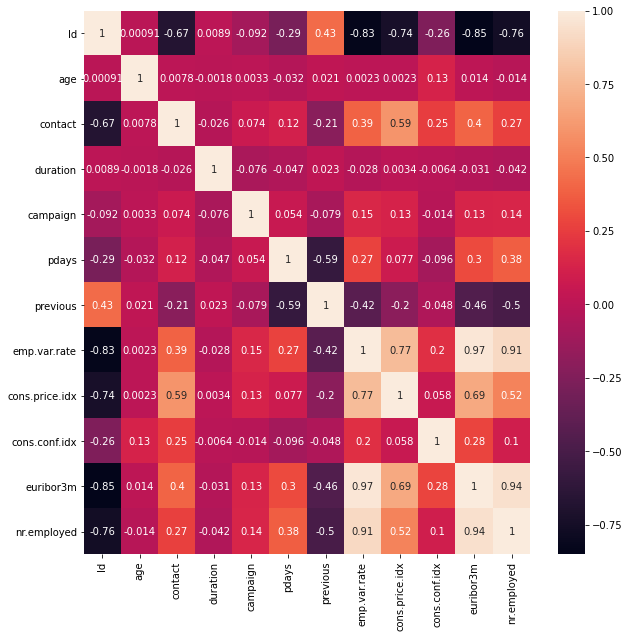

In [555]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)

In [556]:
# drop_indices = ["Id", "campaign", "pdays", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "y"]
drop_indices = ["Id", "emp.var.rate", "euribor3m", "y"]
for i in drop_indices:
    data.drop(i, axis=1, inplace=True)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed
0,49,blue-collar,married,basic.9y,unknown,no,no,0,nov,wed,227,4,999,0,nonexistent,93.200,-42.0,5195.8
1,37,entrepreneur,married,university.degree,no,no,no,1,nov,wed,202,2,999,1,failure,93.200,-42.0,5195.8
2,78,retired,married,basic.4y,no,no,no,0,jul,mon,1148,1,999,0,nonexistent,94.215,-40.3,4991.6
3,36,admin.,married,university.degree,no,yes,no,1,may,mon,120,2,999,0,nonexistent,93.994,-36.4,5191.0
4,59,retired,divorced,university.degree,no,no,no,0,jun,tue,368,2,999,0,nonexistent,92.963,-40.8,5076.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,0,jul,tue,192,1,999,0,nonexistent,94.215,-40.3,4991.6
32946,52,technician,married,professional.course,no,yes,no,0,nov,fri,64,1,999,1,failure,93.200,-42.0,5195.8
32947,54,admin.,married,basic.9y,no,no,yes,0,jul,mon,131,4,999,0,nonexistent,93.918,-42.7,5228.1
32948,29,admin.,married,university.degree,no,no,no,1,may,fri,165,1,999,0,nonexistent,93.994,-36.4,5191.0


In [557]:
months = {"jan":0, "feb":1, "mar":2, "apr":3, "may":4, "jun":5, "jul":6, "aug":7, "sep":8, "oct": 9, "nov":10, "dec":12}

data["month"] = data["month"].apply(lambda x: months.get(x))

In [558]:
days = {"mon":0, "tue":1, "wed":2, "thu":3, "fri":4}

data["day_of_week"] = data["day_of_week"].apply(lambda x: days.get(x))

In [559]:
education = {"illiterate":0, "basic.4y":1, "basic.6y":2, "basic.9y":3, "high.school":4, "professional.course":5, "university.degree":6, "unknown":7}

data["education"] = data["education"].apply(lambda x: education.get(x))

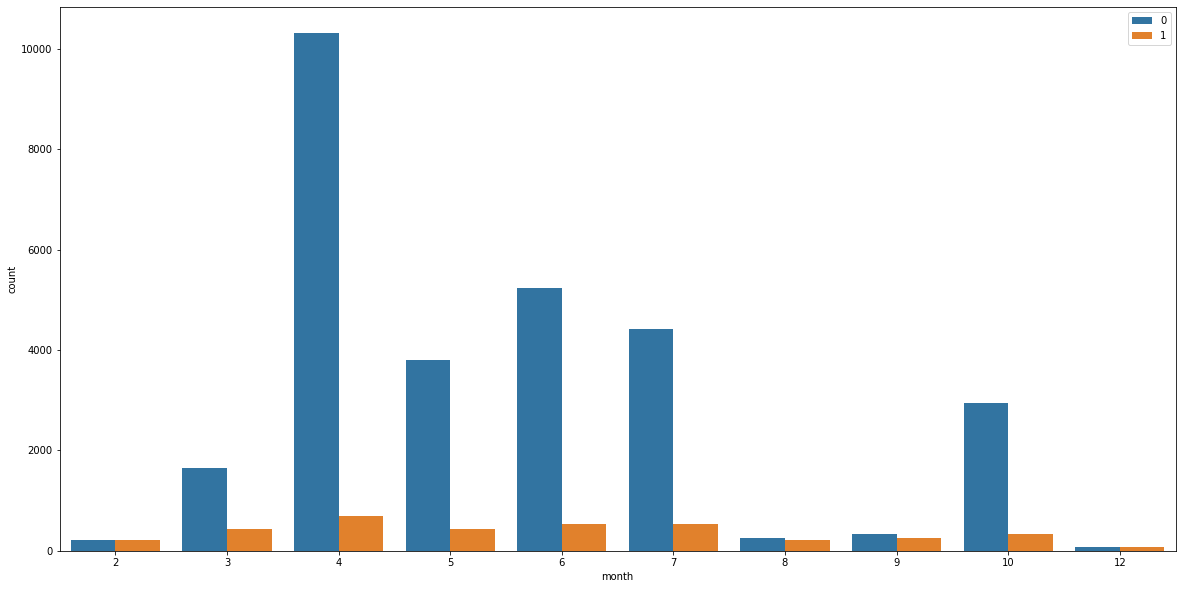

In [560]:
plt.figure(figsize=(20,10))
sns.countplot(x='month',data=data,hue=y)

In [561]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  object 
 2   marital         32950 non-null  object 
 3   education       32950 non-null  int64  
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  int64  
 8   month           32950 non-null  int64  
 9   day_of_week     32950 non-null  int64  
 10  duration        32950 non-null  int64  
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  cons.price.idx  32950 non-null  float64
 16  cons.conf.idx   32950 non-null  float64
 17  nr.employed     32950 non-null 

In [562]:
data = pd.get_dummies(data, columns=["job", "marital", "default", "housing", "loan", "poutcome"])
data

,age,education,contact,month,day_of_week,duration,campaign,pdays,previous,cons.price.idx,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,3,0,10,2,227,4,999,0,93.200,...,0,1,0,0,1,0,0,0,1,0
1,37,6,1,10,2,202,2,999,1,93.200,...,0,1,0,0,1,0,0,1,0,0
2,78,1,0,6,0,1148,1,999,0,94.215,...,0,1,0,0,1,0,0,0,1,0
3,36,6,1,4,0,120,2,999,0,93.994,...,0,0,0,1,1,0,0,0,1,0
4,59,6,0,5,1,368,2,999,0,92.963,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,4,0,6,1,192,1,999,0,94.215,...,0,0,0,1,1,0,0,0,1,0
32946,52,5,0,10,4,64,1,999,1,93.200,...,0,0,0,1,1,0,0,1,0,0
32947,54,3,0,6,0,131,4,999,0,93.918,...,0,1,0,0,0,0,1,0,1,0
32948,29,6,1,4,4,165,1,999,0,93.994,...,0,1,0,0,1,0,0,0,1,0


In [563]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [583]:
from sklearn.model_selection import train_test_split

# data = np.array(data)
X_tr, X_t, y_tr, y_t = train_test_split(data, y, test_size=0.20)

# svc = svm.SVC(kernel="rbf")
# svc.fit(X_tr, y_tr)
lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(X_tr, y_tr)
# dt = DecisionTreeClassifier(criterion="entropy")
# dt.fit(X_tr, y_tr)

LogisticRegression(C=0.01, solver='liblinear')

In [584]:
ypred = svc.predict(X_t)
# ypred = lr.predict(X_t)
# ypred = dt.predict(X_t)

In [585]:
from sklearn.metrics import accuracy_score

accuracy_score(ypred, y_t)

0.8960546282245827

In [298]:
test = pd.read_csv('test.csv')
test.head()

,Id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,14455,32,management,divorced,university.degree,no,no,no,cellular,jul,...,131,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
1,36380,37,unemployed,unknown,university.degree,no,no,no,cellular,jun,...,100,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2
2,40076,73,retired,divorced,professional.course,unknown,yes,no,cellular,jul,...,131,2,999,0,nonexistent,-1.7,94.215,-40.3,0.810,4991.6
3,10778,44,entrepreneur,married,basic.4y,unknown,no,no,telephone,jun,...,48,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
4,27939,28,admin.,single,high.school,no,no,no,cellular,mar,...,144,2,999,0,nonexistent,-1.8,92.843,-50.0,1.531,5099.1


In [299]:
test["contact"] = le.transform(test["contact"])
drop_indices = ["Id", "campaign", "pdays", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"]

for i in drop_indices:
    test.drop(i, axis=1, inplace=True)
    
months = {"jan":0, "feb":1, "mar":2, "apr":3, "may":4, "jun":5, "jul":6, "aug":7, "sep":8, "oct": 9, "nov":10, "dec":12}

test["month"] = test["month"].apply(lambda x: months.get(x))
days = {"mon":0, "tue":1, "wed":2, "thu":3, "fri":4}

test["day_of_week"] = test["day_of_week"].apply(lambda x: days.get(x))
education = {"illiterate":0, "basic.4y":1, "basic.6y":2, "basic.9y":3, "high.school":4, "professional.course":5, "university.degree":6, "unknown":7}

test["education"] = test["education"].apply(lambda x: education.get(x))
test = pd.get_dummies(test, columns=["job", "marital", "default", "housing", "loan", "poutcome"])
test

,age,education,contact,month,day_of_week,duration,previous,cons.conf.idx,job_admin.,job_blue-collar,...,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,32,6,0,6,1,131,0,-42.7,0,0,...,0,1,0,0,1,0,0,0,1,0
1,37,6,0,5,1,100,0,-40.8,0,0,...,0,1,0,0,1,0,0,0,1,0
2,73,5,0,6,3,131,0,-40.3,0,0,...,1,0,0,1,1,0,0,0,1,0
3,44,1,1,5,1,48,0,-41.8,0,0,...,1,1,0,0,1,0,0,0,1,0
4,28,4,0,2,4,144,0,-50.0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,48,3,0,4,1,725,0,-46.2,0,0,...,0,0,0,1,1,0,0,0,1,0
8234,30,4,0,4,4,159,0,-46.2,0,0,...,0,0,0,1,1,0,0,0,1,0
8235,33,4,0,5,0,472,1,-39.8,0,0,...,0,1,0,0,1,0,0,1,0,0
8236,44,2,1,4,0,668,0,-36.4,0,1,...,0,0,0,1,0,0,1,0,1,0


In [306]:
default_yes = pd.Series([0]*8238)
test.insert(26, "default_yes", default_yes)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   8238 non-null   int64  
 1   education             8238 non-null   int64  
 2   contact               8238 non-null   int64  
 3   month                 8238 non-null   int64  
 4   day_of_week           8238 non-null   int64  
 5   duration              8238 non-null   int64  
 6   previous              8238 non-null   int64  
 7   cons.conf.idx         8238 non-null   float64
 8   job_admin.            8238 non-null   uint8  
 9   job_blue-collar       8238 non-null   uint8  
 10  job_entrepreneur      8238 non-null   uint8  
 11  job_housemaid         8238 non-null   uint8  
 12  job_management        8238 non-null   uint8  
 13  job_retired           8238 non-null   uint8  
 14  job_self-employed     8238 non-null   uint8  
 15  job_services         

In [308]:
y = svc.predict(test)